In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [2]:
def sigmoid(x):
    """
    Compute the sigmoid of x

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(x)
    """
    s = 1/(1+np.exp(-x))
    return s

def relu(x):
    """
    Compute the relu of x

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    s -- relu(x)
    """
    s = np.maximum(0,x)
    
    return s

In [3]:
def initialize_parameters(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    b1 -- bias vector of shape (layer_dims[l], 1)
                    Wl -- weight matrix of shape (layer_dims[l-1], layer_dims[l])
                    bl -- bias vector of shape (1, layer_dims[l])
                    
    Tips:
    - For example: the layer_dims for the "Planar Data classification model" would have been [2,2,1]. 
    This means W1's shape was (2,2), b1 was (1,2), W2 was (2,1) and b2 was (1,1). Now you have to generalize it!
    - In the for loop, use parameters['W' + str(l)] to access Wl, where l is the iterative integer.
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims) # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1])*  np.sqrt(2 / layer_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
        #assert(parameters['W' + str(l)].shape == layer_dims[l], layer_dims[l-1])
        #assert(parameters['W' + str(l)].shape == layer_dims[l], 1)
        
    return parameters

In [4]:
def compute_cost(a3, Y):
    
    """
    Implement the cost function
    
    Arguments:
    a3 -- post-activation, output of forward propagation
    Y -- "true" labels vector, same shape as a3
    
    Returns:
    cost - value of the cost function
    """
    m = Y.shape[1]
    
    logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
    cost = 1./m * np.sum(logprobs)
    
    return cost

In [204]:
def forward_propagation(X, parameters):
    """
    Implements the forward propagation (and computes the loss) presented in Figure 2.
    
    Arguments:
    X -- input dataset, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3":
                    W1 -- weight matrix of shape ()
                    b1 -- bias vector of shape ()
                    W2 -- weight matrix of shape ()
                    b2 -- bias vector of shape ()
                    W3 -- weight matrix of shape ()
                    b3 -- bias vector of shape ()
    
    Returns:
    loss -- the loss function (vanilla logistic loss)
    """
    
    # retrieve parameters
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    W4 = parameters["W4"]
    b4 = parameters["b4"]
    
    # LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
    z1 = np.dot(W1, X) + b1
    a1 = relu(z1)
    z2 = np.dot(W2, a1) + b2
    a2 = relu(z2)
    z3 = np.dot(W3, a2) + b3
    a3 = relu(z3)
    z4 = np.dot(W4, a3) + b4
    a4 = sigmoid(z4)
    
    cache = (z1, a1, W1, b1, z2, a2, W2, b2, z3, a3, W3, b3, z4, a4, W4, b4)
    
    return a4, cache

def backward_propagation(X, Y, cache):
    """
    Implement the backward propagation presented in figure 2.
    
    Arguments:
    X -- input dataset, of shape (input size, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat)
    cache -- cache output from forward_propagation()
    
    Returns:
    gradients -- A dictionary with the gradients with respect to each parameter, activation and pre-activation variables
    """
    m = X.shape[1]
    (z1, a1, W1, b1, z2, a2, W2, b2, z3, a3, W3, b3, z4, a4, W4, b4) = cache
    
    dz4 = 1./m * (a4 - Y)
    dW4 = np.dot(dz4, a3.T)
    db4 = np.sum(dz4, axis=1, keepdims = True)
    
    da3 = np.dot(W4.T, dz4)
    dz3 = np.multiply(da3, np.int64(a3 > 0))
    dW3 = np.dot(dz3, a2.T)
    db3 = np.sum(dz3, axis=1, keepdims = True)
    
    da2 = np.dot(W3.T, dz3)
    dz2 = np.multiply(da2, np.int64(a2 > 0))
    dW2 = np.dot(dz2, a1.T)
    db2 = np.sum(dz2, axis=1, keepdims = True)
    
    da1 = np.dot(W2.T, dz2)
    dz1 = np.multiply(da1, np.int64(a1 > 0))
    dW1 = np.dot(dz1, X.T)
    db1 = np.sum(dz1, axis=1, keepdims = True)
    
    gradients = {"dz4": dz4, "dW4": dW4, "db4": db4,
                 "da3": da3, "dz3": dz3, "dW3": dW3, "db3": db3,
                 "da2": da2, "dz2": dz2, "dW2": dW2, "db2": db2,
                 "da1": da1, "dz1": dz1, "dW1": dW1, "db1": db1}
    
    return gradients
def predict(X, y, parameters):
    """
    This function is used to predict the results of a  n-layer neural network.
    
    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model
    
    Returns:
    p -- predictions for the given dataset X
    """
    
    m = X.shape[1]
    p = np.zeros((1,m), dtype = np.int)
    
    # Forward propagation
    a4, caches = forward_propagation(X, parameters)
    
    # convert probas to 0/1 predictions
    for i in range(0, a4.shape[1]):
        if a4[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0

    # print results

    #print ("predictions: " + str(p[0,:]))
    #print ("true labels: " + str(y[0,:]))
    #print("Accuracy: "  + str(np.mean((p[0,:] == y[0,:]))))
    
    return p



def random_mini_batches(X, Y, mini_batch_size = 64):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (1, number of examples)
    mini_batch_size -- size of the mini-batches, integer
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    
    np.random.seed()            # To make your "random" minibatches the same as ours
    m = X.shape[1]                  # number of training examples
    mini_batches = []
    
    if mini_batch_size == 1:
        for k in range(0,m):
            mini_batch_X = X
            mini_batch_Y = Y
            mini_batch = (mini_batch_X, mini_batch_Y)
            mini_batches.append(mini_batch)
        return mini_batches
        
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((1,m))

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        ### START CODE HERE ### (approx. 2 lines)
        mini_batch_X = shuffled_X[:,(k)*mini_batch_size: (k+1)*mini_batch_size]
        mini_batch_Y = shuffled_Y[:,(k)*mini_batch_size: (k+1)*mini_batch_size]
        ### END CODE HERE ###
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        ### START CODE HERE ### (approx. 2 lines)
        mini_batch_X = shuffled_X[:,num_complete_minibatches*mini_batch_size:]
        mini_batch_Y = shuffled_Y[:,num_complete_minibatches*mini_batch_size:]
        ### END CODE HERE ###
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

# GRADED FUNCTION: initialize_adam

def initialize_adam(parameters) :
    """
    Initializes v and s as two python dictionaries with:
                - keys: "dW1", "db1", ..., "dWL", "dbL" 
                - values: numpy arrays of zeros of the same shape as the corresponding gradients/parameters.
    
    Arguments:
    parameters -- python dictionary containing your parameters.
                    parameters["W" + str(l)] = Wl
                    parameters["b" + str(l)] = bl
    
    Returns: 
    v -- python dictionary that will contain the exponentially weighted average of the gradient.
                    v["dW" + str(l)] = ...
                    v["db" + str(l)] = ...
    s -- python dictionary that will contain the exponentially weighted average of the squared gradient.
                    s["dW" + str(l)] = ...
                    s["db" + str(l)] = ...

    """
    
    L = len(parameters) // 2 # number of layers in the neural networks
    v = {}
    s = {}
    
    # Initialize v, s. Input: "parameters". Outputs: "v, s".
    for l in range(L):
    ### START CODE HERE ### (approx. 4 lines)
        v["dW" + str(l+1)] = np.zeros((parameters["W"+str(l+1)].shape[0],parameters["W"+str(l+1)].shape[1]))
        v["db" + str(l+1)] = np.zeros((parameters["b"+str(l+1)].shape[0],parameters["b"+str(l+1)].shape[1]))
        s["dW" + str(l+1)] = np.zeros((parameters["W"+str(l+1)].shape[0],parameters["W"+str(l+1)].shape[1]))
        s["db" + str(l+1)] = np.zeros((parameters["b"+str(l+1)].shape[0],parameters["b"+str(l+1)].shape[1]))
    ### END CODE HERE ###
    
    return v, s
def update_parameters_with_adam(parameters, grads, v, s, t, learning_rate = 0.01,
                                beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8):
    """
    Update parameters using Adam
    
    Arguments:
    parameters -- python dictionary containing your parameters:
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    grads -- python dictionary containing your gradients for each parameters:
                    grads['dW' + str(l)] = dWl
                    grads['db' + str(l)] = dbl
    v -- Adam variable, moving average of the first gradient, python dictionary
    s -- Adam variable, moving average of the squared gradient, python dictionary
    learning_rate -- the learning rate, scalar.
    beta1 -- Exponential decay hyperparameter for the first moment estimates 
    beta2 -- Exponential decay hyperparameter for the second moment estimates 
    epsilon -- hyperparameter preventing division by zero in Adam updates

    Returns:
    parameters -- python dictionary containing your updated parameters 
    v -- Adam variable, moving average of the first gradient, python dictionary
    s -- Adam variable, moving average of the squared gradient, python dictionary
    """
    
    L = len(parameters) // 2                 # number of layers in the neural networks
    v_corrected = {}                         # Initializing first moment estimate, python dictionary
    s_corrected = {}                         # Initializing second moment estimate, python dictionary
    
    # Perform Adam update on all parameters
    for l in range(L):
        # Moving average of the gradients. Inputs: "v, grads, beta1". Output: "v".
        ### START CODE HERE ### (approx. 2 lines)
        v["dW" + str(l+1)] = beta1*v["dW" + str(l+1)] + (1-beta1)*grads['dW' + str(l+1)]
        v["db" + str(l+1)] = beta1*v["db" + str(l+1)] + (1-beta1)*grads['db' + str(l+1)]
        ### END CODE HERE ###

        # Compute bias-corrected first moment estimate. Inputs: "v, beta1, t". Output: "v_corrected".
        ### START CODE HERE ### (approx. 2 lines)
        v_corrected["dW" + str(l+1)] = v["dW" + str(l+1)]/(1-beta1**t)
        v_corrected["db" + str(l+1)] = v["db" + str(l+1)]/(1-beta1**t)
        ### END CODE HERE ###

        # Moving average of the squared gradients. Inputs: "s, grads, beta2". Output: "s".
        ### START CODE HERE ### (approx. 2 lines)
        s["dW" + str(l+1)] = beta2*s["dW" + str(l+1)] + (1-beta2)*grads['dW' + str(l+1)]**2
        s["db" + str(l+1)] = beta2*s["db" + str(l+1)] + (1-beta2)*grads['db' + str(l+1)]**2
        ### END CODE HERE ###

        # Compute bias-corrected second raw moment estimate. Inputs: "s, beta2, t". Output: "s_corrected".
        ### START CODE HERE ### (approx. 2 lines)
        s_corrected["dW" + str(l+1)] = s["dW" + str(l+1)]/(1-beta2**t)
        s_corrected["db" + str(l+1)] = s["db" + str(l+1)]/(1-beta2**t)
        ### END CODE HERE ###

        # Update parameters. Inputs: "parameters, learning_rate, v_corrected, s_corrected, epsilon". Output: "parameters".
        ### START CODE HERE ### (approx. 2 lines)
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate*v_corrected["dW" + str(l+1)]/(np.sqrt(s_corrected["dW" + str(l+1)])+epsilon)
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate*v_corrected["db" + str(l+1)]/(np.sqrt(s_corrected["db" + str(l+1)])+epsilon)
        ### END CODE HERE ###

    return parameters, v, s

# GRADED FUNCTION: initialize_velocity

def initialize_velocity(parameters):
    """
    Initializes the velocity as a python dictionary with:
                - keys: "dW1", "db1", ..., "dWL", "dbL" 
                - values: numpy arrays of zeros of the same shape as the corresponding gradients/parameters.
    Arguments:
    parameters -- python dictionary containing your parameters.
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    
    Returns:
    v -- python dictionary containing the current velocity.
                    v['dW' + str(l)] = velocity of dWl
                    v['db' + str(l)] = velocity of dbl
    """
    
    L = len(parameters) // 2 # number of layers in the neural networks
    v = {}
    
    # Initialize velocity
    for l in range(L):
        ### START CODE HERE ### (approx. 2 lines)
        v["dW" + str(l+1)] = np.zeros((parameters["W"+str(l+1)].shape[0],parameters["W"+str(l+1)].shape[1]))
        v["db" + str(l+1)] = np.zeros((parameters["b"+str(l+1)].shape[0],parameters["b"+str(l+1)].shape[1]))
        ### END CODE HERE ###
        
    return v
# GRADED FUNCTION: update_parameters_with_momentum

def update_parameters_with_momentum(parameters, grads, v, beta, learning_rate):
    """
    Update parameters using Momentum
    
    Arguments:
    parameters -- python dictionary containing your parameters:
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    grads -- python dictionary containing your gradients for each parameters:
                    grads['dW' + str(l)] = dWl
                    grads['db' + str(l)] = dbl
    v -- python dictionary containing the current velocity:
                    v['dW' + str(l)] = ...
                    v['db' + str(l)] = ...
    beta -- the momentum hyperparameter, scalar
    learning_rate -- the learning rate, scalar
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    v -- python dictionary containing your updated velocities
    """

    L = len(parameters) // 2 # number of layers in the neural networks
    
    # Momentum update for each parameter
    for l in range(L):
        
        ### START CODE HERE ### (approx. 4 lines)
        # compute velocities
        v["dW" + str(l+1)] = beta*v["dW" + str(l+1)] + (1-beta)*grads['dW' + str(l+1)]
        v["db" + str(l+1)] = beta*v["db" + str(l+1)] + (1-beta)*grads['db' + str(l+1)]
        # update parameters
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate*v["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate*v["db" + str(l+1)]
        ### END CODE HERE ###
        
    return parameters, v

In [112]:
def model(X, Y, layers_dims, optimizer, learning_rate = 0.0007, mini_batch_size = 20, beta = 0.9,
          beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8, num_epochs = 10000, print_cost = True):
    """
    3-layer neural network model which can be run in different optimizer modes.
    
    Arguments:
    X -- input data, of shape (2, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (1, number of examples)
    layers_dims -- python list, containing the size of each layer
    learning_rate -- the learning rate, scalar.
    mini_batch_size -- the size of a mini batch
    beta -- Momentum hyperparameter
    beta1 -- Exponential decay hyperparameter for the past gradients estimates 
    beta2 -- Exponential decay hyperparameter for the past squared gradients estimates 
    epsilon -- hyperparameter preventing division by zero in Adam updates
    num_epochs -- number of epochs
    print_cost -- True to print the cost every 1000 epochs

    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    
    L = len(layers_dims)             # number of layers in the neural networks
    costs = []                       # to keep track of the cost
    t = 0                            # initializing the counter required for Adam update
    m = X.shape[1]                   # number of training examples
    alpha=learning_rate
    
    # Initialize parameters
    parameters = initialize_parameters(layers_dims)

    # Initialize the optimizer
    if optimizer == "gd":
        pass # no initialization required for gradient descent
    elif optimizer == "momentum":
        v = initialize_velocity(parameters)
    elif optimizer == "adam":
        v, s = initialize_adam(parameters)
    
    # Optimization loop
    for i in range(num_epochs):
        
        # Define the random minibatches. We increment the seed to reshuffle differently the dataset after each epoch
        minibatches = random_mini_batches(X, Y, mini_batch_size)
        cost_total = 0
        
        for minibatch in minibatches:
            
            # Select a minibatch
            (minibatch_X, minibatch_Y) = minibatch

            # Forward propagation
            a3, caches = forward_propagation(minibatch_X, parameters)

            # Compute cost and add to the cost total
            cost_total += compute_cost(a3, minibatch_Y)

            # Backward propagation
            grads = backward_propagation(minibatch_X, minibatch_Y, caches)

            # Update parameters
            if optimizer == "gd":
                parameters = update_parameters_with_gd(parameters, grads, learning_rate)
            elif optimizer == "momentum":
                parameters, v = update_parameters_with_momentum(parameters, grads, v, beta, learning_rate)
            elif optimizer == "adam":
                t = t + 1 # Adam counter
                parameters, v, s = update_parameters_with_adam(parameters, grads, v, s,
                                                               t, learning_rate, beta1, beta2,  epsilon)
        cost_avg = cost_total / m
        
        # Print the cost every 1000 epoch
        if print_cost and i % 1000 == 0:
            print ("Cost after epoch %i: %f, alpha %i: %f" %(i, cost_avg, i, learning_rate))
        if print_cost and i % 100 == 0:
            costs.append(cost_avg)
        learning_rate = alpha * 0.999 ** i
                
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('epochs (per 100)')
    plt.title("Learning rate = " + str(learning_rate))
    plt.show()

    return parameters

In [136]:
data = pd.read_csv('/Users/emiliano/Downloads/nlp-getting-started/train.csv')
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [137]:
data = data.fillna('')

In [138]:
import textstat as txt

In [139]:
test_data = (
    "Playing games has always been thought to be important to "
    "the development of well-balanced and creative children; "
    "however, what part, if any, they should play in the lives "
    "of adults has never been researched that deeply. I believe "
    "that playing games is every bit as important for adults "
    "as for children. Not only is taking time out to play games "
    "with our children and other adults valuable to building "
    "interpersonal relationships but is also a wonderful way "
    "to release built up tension."
)

In [140]:
data.text[4],data.text[98]

('Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school ',
 '@flowri were you marinading it or was it an accident?')

In [141]:
test_data = (data.text[4])

In [142]:
txt.dale_chall_readability_score_v2(test_data),txt.automated_readability_index(test_data),txt.coleman_liau_index(test_data),txt.lexicon_count(test_data),txt.linsear_write_formula(test_data),txt.smog_index(test_data)

(8.38, 7.8, 7.83, 16, 7.0, 0.0)

In [143]:
test_data = (data.text[98])
txt.dale_chall_readability_score_v2(test_data),txt.automated_readability_index(test_data),txt.coleman_liau_index(test_data),txt.lexicon_count(test_data),txt.linsear_write_formula(test_data),txt.smog_index(test_data)

(5.71, 4.3, 5.6, 10, 6.0, 0.0)

Usaremos el coleman liau index, automated readability y linsear

In [144]:
Ntxt = data.keyword.apply(txt.automated_readability_index)
Ntxt.min(), Ntxt.max()

(-2.2, 78.0)

In [145]:
Ntxt = Ntxt + abs(Ntxt.min())
Ntxt.min(),Ntxt.max()

(0.0, 80.2)

In [146]:
Nkey1,Nkey2,Nkey3 = data.keyword.apply(txt.automated_readability_index),data.keyword.apply(txt.coleman_liau_index),data.keyword.apply(txt.linsear_write_formula)
Nkey1,Nkey2,Nkey3 = Nkey1 + abs(Nkey1.min()), Nkey2 + abs(Nkey2.min()), Nkey3 + abs(Nkey3.min())
Nloc1,Nloc2,Nloc3 = data.location.apply(txt.automated_readability_index),data.location.apply(txt.coleman_liau_index),data.location.apply(txt.linsear_write_formula)
Nloc1,Nloc2,Nloc3 = Nloc1 + abs(Nloc1.min()), Nloc2 + abs(Nloc2.min()), Nloc3 + abs(Nloc3.min())
Ntxt1,Ntxt2,Ntxt3 = data.text.apply(txt.automated_readability_index),data.text.apply(txt.coleman_liau_index),data.text.apply(txt.linsear_write_formula)
Ntxt1,Ntxt2,Ntxt3 = Ntxt1 + abs(Ntxt1.min()), Ntxt2 + abs(Ntxt2.min()), Ntxt3 + abs(Ntxt3.min())

Normalizamos

In [147]:
def normalize(x, col_max):
    if x == -1:
        return np.nan
    else:
        return x/col_max

In [148]:
data['Nkey1'],data['Nkey2'],data['Nkey3']=Nkey1,Nkey2,Nkey3
data['Nloc1'],data['Nloc2'],data['Nloc3']=Nloc1,Nloc2,Nloc3
data['Ntxt1'],data['Ntxt2'],data['Ntxt3']=Ntxt1,Ntxt2,Ntxt3
data.head()

,id,keyword,location,text,target,Nkey1,Nkey2,Nkey3,Nloc1,Nloc2,Nloc3,Ntxt1,Ntxt2,Ntxt3
0,1,,,Our Deeds are the Reason of this #earthquake M...,1,2.2,6.4,0.0,16.3,23.8,0.0,14.6,20.04,6.0
1,4,,,Forest fire near La Ronge Sask. Canada,1,2.2,6.4,0.0,16.3,23.8,0.0,12.5,18.96,3.0
2,5,,,All residents asked to 'shelter in place' are ...,1,2.2,6.4,0.0,16.3,23.8,0.0,16.9,23.46,7.5
3,6,,,"13,000 people receive #wildfires evacuation or...",1,2.2,6.4,0.0,16.3,23.8,0.0,25.1,33.47,5.5
4,7,,,Just got sent this photo from Ruby #Alaska as ...,1,2.2,6.4,0.0,16.3,23.8,0.0,16.7,21.04,7.5


In [151]:
data['Ntxt1'] = data['Ntxt1'].apply(lambda x: normalize(x,data['Ntxt1'].max()))
data['Ntxt2'] = data['Ntxt2'].apply(lambda x: normalize(x,data['Ntxt2'].max()))
data['Ntxt3'] = data['Ntxt3'].apply(lambda x: normalize(x,data['Ntxt3'].max()))
data['Nkey1'] = data['Nkey1'].apply(lambda x: normalize(x,data['Nkey1'].max()))
data['Nkey2'] = data['Nkey2'].apply(lambda x: normalize(x,data['Nkey2'].max()))
data['Nkey3'] = data['Nkey3'].apply(lambda x: normalize(x,data['Nkey3'].max()))
data['Nloc1'] = data['Nloc1'].apply(lambda x: normalize(x,data['Nloc1'].max()))
data['Nloc2'] = data['Nloc2'].apply(lambda x: normalize(x,data['Nloc2'].max()))
data['Nloc3'] = data['Nloc3'].apply(lambda x: normalize(x,data['Nloc3'].max()))
data.head()

,id,keyword,location,text,target,Nkey1,Nkey2,Nkey3,Nloc1,Nloc2,Nloc3,Ntxt1,Ntxt2,Ntxt3
0,1,,,Our Deeds are the Reason of this #earthquake M...,1,0.027431,0.068958,0.0,0.080454,0.102582,0.0,0.179141,0.230107,0.315789
1,4,,,Forest fire near La Ronge Sask. Canada,1,0.027431,0.068958,0.0,0.080454,0.102582,0.0,0.153374,0.217706,0.157895
2,5,,,All residents asked to 'shelter in place' are ...,1,0.027431,0.068958,0.0,0.080454,0.102582,0.0,0.207362,0.269377,0.394737
3,6,,,"13,000 people receive #wildfires evacuation or...",1,0.027431,0.068958,0.0,0.080454,0.102582,0.0,0.307975,0.384315,0.289474
4,7,,,Just got sent this photo from Ruby #Alaska as ...,1,0.027431,0.068958,0.0,0.080454,0.102582,0.0,0.204908,0.241589,0.394737


In [152]:
feature_cols = ['Nkey1','Nkey2','Nkey3', 'Nloc1','Nloc2','Nloc3','Ntxt1','Ntxt2','Ntxt3']
datax_train = data.loc[:, feature_cols].values.T
datax_train.shape

(9, 7613)

In [153]:
datay_train = data['target'].values
datay_train = datay_train.reshape(1,-1)
datay_train.shape

(1, 7613)

In [117]:
r = -4*np.random.rand()
alpha = 10**r
alpha

0.00014353502301939458

In [157]:
r=-3* np.random.rand()
betar = 1-10**r
betar

0.546147371228934

Cost after epoch 0: 0.000378, alpha 0: 0.000700
Cost after epoch 1000: 0.000316, alpha 1000: 0.000258
Cost after epoch 2000: 0.000314, alpha 2000: 0.000095
Cost after epoch 3000: 0.000314, alpha 3000: 0.000035
Cost after epoch 4000: 0.000314, alpha 4000: 0.000013
Cost after epoch 5000: 0.000314, alpha 5000: 0.000005
Cost after epoch 6000: 0.000314, alpha 6000: 0.000002
Cost after epoch 7000: 0.000313, alpha 7000: 0.000001
Cost after epoch 8000: 0.000314, alpha 8000: 0.000000
Cost after epoch 9000: 0.000313, alpha 9000: 0.000000
Cost after epoch 10000: 0.000314, alpha 10000: 0.000000
Cost after epoch 11000: 0.000314, alpha 11000: 0.000000
Cost after epoch 12000: 0.000313, alpha 12000: 0.000000
Cost after epoch 13000: 0.000314, alpha 13000: 0.000000
Cost after epoch 14000: 0.000314, alpha 14000: 0.000000
Cost after epoch 15000: 0.000313, alpha 15000: 0.000000
Cost after epoch 16000: 0.000314, alpha 16000: 0.000000
Cost after epoch 17000: 0.000314, alpha 17000: 0.000000
Cost after epoch 1

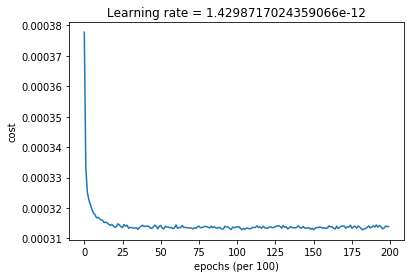

Accuracy: 0.6781820570077499


In [181]:
layers_dims = [datax_train.shape[0],14,8,4,1]
parameters = model(datax_train, datay_train, layers_dims, optimizer = "adam", learning_rate = 0.0007, mini_batch_size = 2048, beta = betar, beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8, num_epochs = 20000)
predictions = predict(datax_train, datay_train, parameters)

In [184]:
import sklearn.metrics

In [189]:
sklearn.metrics.f1_score(datay_train[0],predictions[0])

0.6163482618227373

In [196]:
test = pd.read_csv('/Users/emiliano/Downloads/nlp-getting-started/test.csv')
test = test.fillna('')

In [197]:
Nkey1,Nkey2,Nkey3 = test.keyword.apply(txt.automated_readability_index),test.keyword.apply(txt.coleman_liau_index),test.keyword.apply(txt.linsear_write_formula)
Nkey1,Nkey2,Nkey3 = Nkey1 + abs(Nkey1.min()), Nkey2 + abs(Nkey2.min()), Nkey3 + abs(Nkey3.min())
Nloc1,Nloc2,Nloc3 = test.location.apply(txt.automated_readability_index),test.location.apply(txt.coleman_liau_index),test.location.apply(txt.linsear_write_formula)
Nloc1,Nloc2,Nloc3 = Nloc1 + abs(Nloc1.min()), Nloc2 + abs(Nloc2.min()), Nloc3 + abs(Nloc3.min())
Ntxt1,Ntxt2,Ntxt3 = test.text.apply(txt.automated_readability_index),test.text.apply(txt.coleman_liau_index),test.text.apply(txt.linsear_write_formula)
Ntxt1,Ntxt2,Ntxt3 = Ntxt1 + abs(Ntxt1.min()), Ntxt2 + abs(Ntxt2.min()), Ntxt3 + abs(Ntxt3.min())

In [200]:
test['Nkey1'],test['Nkey2'],test['Nkey3']=Nkey1,Nkey2,Nkey3
test['Nloc1'],test['Nloc2'],test['Nloc3']=Nloc1,Nloc2,Nloc3
test['Ntxt1'],test['Ntxt2'],test['Ntxt3']=Ntxt1,Ntxt2,Ntxt3
test.head()

,id,keyword,location,text,Nkey1,Nkey2,Nkey3,Nloc1,Nloc2,Nloc3,Ntxt1,Ntxt2,Ntxt3
0,0,,,Just happened a terrible car crash,2.2,6.4,0.0,14.3,23.8,0.0,11.8,23.59,3.5
1,2,,,"Heard about #earthquake is different cities, s...",2.2,6.4,0.0,14.3,23.8,0.0,19.9,31.52,6.0
2,3,,,"there is a forest fire at spot pond, geese are...",2.2,6.4,0.0,14.3,23.8,0.0,14.9,22.33,9.0
3,9,,,Apocalypse lighting. #Spokane #wildfires,2.2,6.4,0.0,14.3,23.8,0.0,31.6,42.51,2.5
4,11,,,Typhoon Soudelor kills 28 in China and Taiwan,2.2,6.4,0.0,14.3,23.8,0.0,12.4,24.31,3.5


In [202]:
test['Ntxt1'] = test['Ntxt1'].apply(lambda x: normalize(x,test['Ntxt1'].max()))
test['Ntxt2'] = test['Ntxt2'].apply(lambda x: normalize(x,test['Ntxt2'].max()))
test['Ntxt3'] = test['Ntxt3'].apply(lambda x: normalize(x,test['Ntxt3'].max()))
test['Nkey1'] = test['Nkey1'].apply(lambda x: normalize(x,test['Nkey1'].max()))
test['Nkey2'] = test['Nkey2'].apply(lambda x: normalize(x,test['Nkey2'].max()))
test['Nkey3'] = test['Nkey3'].apply(lambda x: normalize(x,test['Nkey3'].max()))
test['Nloc1'] = test['Nloc1'].apply(lambda x: normalize(x,test['Nloc1'].max()))
test['Nloc2'] = test['Nloc2'].apply(lambda x: normalize(x,test['Nloc2'].max()))
test['Nloc3'] = test['Nloc3'].apply(lambda x: normalize(x,test['Nloc3'].max()))
test.head()

,id,keyword,location,text,Nkey1,Nkey2,Nkey3,Nloc1,Nloc2,Nloc3,Ntxt1,Ntxt2,Ntxt3
0,0,,,Just happened a terrible car crash,0.027431,0.068958,0.0,0.09316,0.170965,0.0,0.160763,0.327457,0.200000
1,2,,,"Heard about #earthquake is different cities, s...",0.027431,0.068958,0.0,0.09316,0.170965,0.0,0.271117,0.437535,0.342857
2,3,,,"there is a forest fire at spot pond, geese are...",0.027431,0.068958,0.0,0.09316,0.170965,0.0,0.202997,0.309967,0.514286
3,9,,,Apocalypse lighting. #Spokane #wildfires,0.027431,0.068958,0.0,0.09316,0.170965,0.0,0.430518,0.590089,0.142857
4,11,,,Typhoon Soudelor kills 28 in China and Taiwan,0.027431,0.068958,0.0,0.09316,0.170965,0.0,0.168937,0.337451,0.200000


In [203]:
feature_cols = ['Nkey1','Nkey2','Nkey3', 'Nloc1','Nloc2','Nloc3','Ntxt1','Ntxt2','Ntxt3']
datax_test = test.loc[:, feature_cols].values.T
datax_test.shape

(9, 3263)

In [205]:
predict(datax_test,datay_train,parameters)

array([[1, 1, 1, ..., 1, 1, 1]])